Цель: научится применять модели линейной регресси библиотеки scikit-learn к набору эмпирических данных

Дано: сsv-файл

Результат: эмпирическая формула

Ход выполнения:

Загрузить данные из файла.

Визуализировать загруженные данные (диаграмма рассеяния, график).

Разбить данные на обучающую и тестовую выборки.

Выбрать модель регрессии.

Обучить модель регрессии на обучающих данных.

Проверить качество полученной модели на тестовых данных.

Визуализировать результат.

Загрузим данные из CSV-файла с помощью библиотеки pandas.

In [12]:
import pandas as pd

df = pd.read_csv('lab1-02.csv', header=None)
df.columns = ['x', 'y']

Построим диаграмму рассеяния для анализа распределения данных.

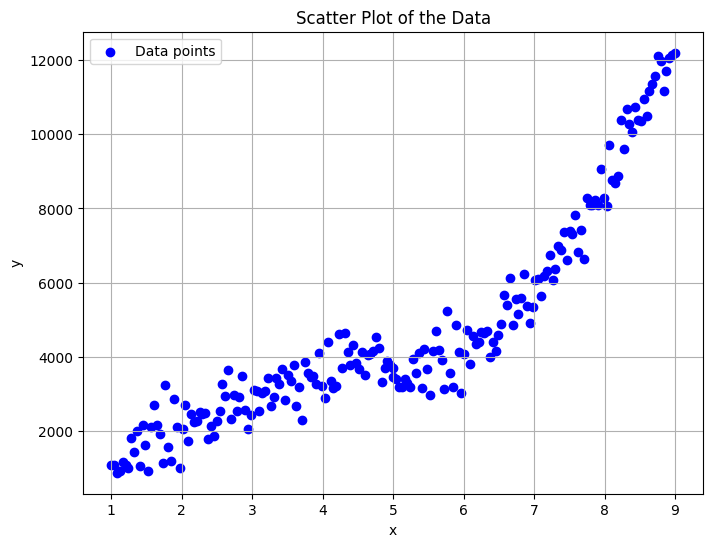

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid()
plt.show()

Преобразуем данные в полиномиальные признаки

In [14]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['x']])

Разобьём данные на обучающую и тестовую выборки в соотношении 80/20.

In [15]:
from sklearn.model_selection import train_test_split

X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X_poly, df['y'], test_size=0.2, random_state=42)

Обучим модель линейной регрессии. Создается объект модели линейной регрессии и обучается на обучающих данных (полиномиальные признаки X_train и целевая переменная y_train).

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

Предсказание и оценка модели. С помощью r2_score вычисляется коэффициент детерминации, который показывает, насколько хорошо модель объясняет вариацию данных

In [17]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R² (полиномиальная регрессия): {r2:.4f}')

R² (полиномиальная регрессия): 0.8669


Построим график с линией регрессии и исходными данными.

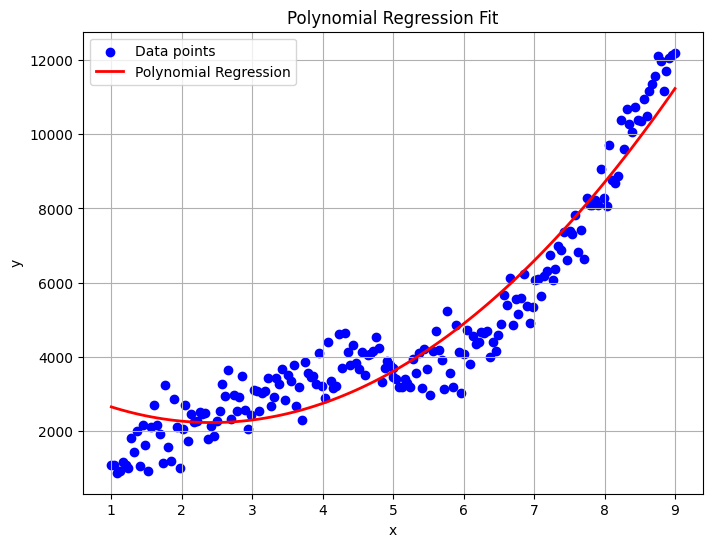

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Data points')
x_grid = pd.DataFrame({'x': np.linspace(min(df['x']), max(df['x']), 100)})
X_grid_poly = poly.transform(x_grid)
plt.plot(x_grid, model.predict(X_grid_poly), color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid()
plt.show()

Добавим также эмпирическую формулу, которая позволяет делать предсказания на основе входных данных

In [21]:
coefficients = model.coef_
intercept = model.intercept_
print(f'Эмпирическая формула: y = {coefficients[1]:.4f}x + {coefficients[2]:.4f}x^2 + {intercept:.4f}')

Эмпирическая формула: y = -1008.7378x + 208.1004x^2 + 3453.7233


Ниже приведен полный код

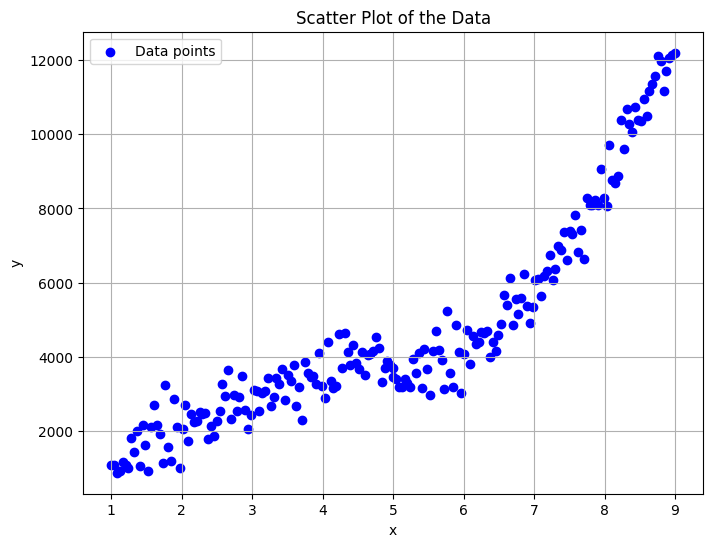

R² (полиномиальная регрессия): 0.8669


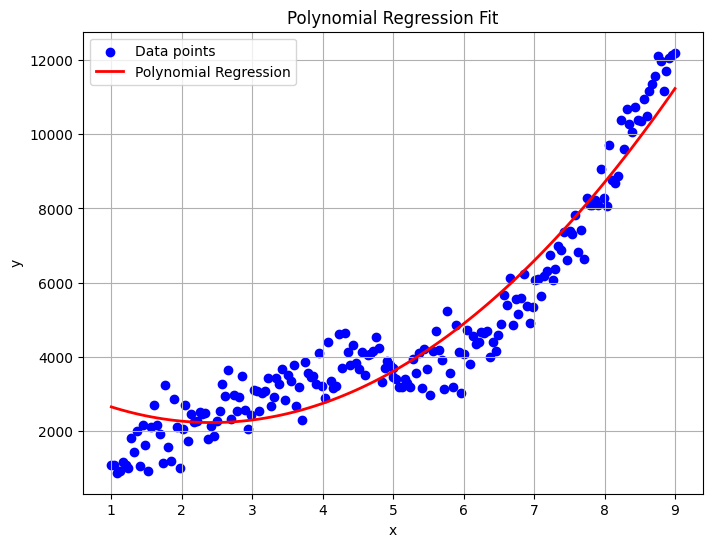

Эмпирическая формула: y = -1008.7378x + 208.1004x^2 + 3453.7233


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

df = pd.read_csv('lab1-02.csv', header=None)
df.columns = ['x', 'y']

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', marker='o', label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of the Data')
plt.legend()
plt.grid()
plt.show()

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['x']])

X_train, X_test, y_train, y_test = train_test_split(X_poly, df['y'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R² (полиномиальная регрессия): {r2:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Data points')

x_grid = pd.DataFrame({'x': np.linspace(min(df['x']), max(df['x']), 100)})
X_grid_poly = poly.transform(x_grid)
plt.plot(x_grid, model.predict(X_grid_poly), color='red', linewidth=2, label='Polynomial Regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid()
plt.show()

coefficients = model.coef_
intercept = model.intercept_
print(f'Эмпирическая формула: y = {coefficients[1]:.4f}x + {coefficients[2]:.4f}x^2 + {intercept:.4f}')